## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa prosta

Regresja liniowa prosta, to szczególny przypadek regresji liniowej, w którym zmienną objaśnaną przewidujemy za pomocą jednej zmiennej objaśniającej. Zadanie będzie polegało na wyznaczeniu funkcji regresji opisującej zależność zarobków od lat doświadczenia. 

Zbiór danych do tego zadania, to Salary.csv. Znajduje się w katalogu datasets.
W zbiorze danych znajduje się 35 obserwacji. Każdy wpis jest osobną obserwacją. W zbiorze znajdują się 3 kolumny: YearsExperience, Age i Salary. W pierwszym zadaniu należy wykorzystać YearsExperience i Salary, pomijając Age.

### Zadanie 1

Wczytaj dane z pliku Salary.csv, a następnie stwórz wykres przedstawiający obserwacje.

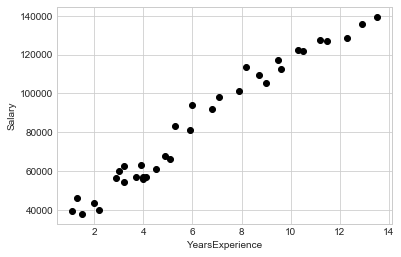

In [1]:
import pandas as pd

df = pd.read_csv('datasets/Salary.csv', sep=',')
x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

# YOUR CODE HERE

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.plot(x, y, 'o', color='black')

### Zadanie 2

Implementacja algorytmu regresji liniowej prostej.

Żeby dobrze zrozumieć zapis matematyczny, który początkowo może sprawiać problemy, przejdziemy po kolei po elementach składowych algorytmu. Następnie złączymy elementy w całość.

Wzór na regresję liniową w naszym przypadku będzie wyglądał następująco:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 = \beta_{0} + \beta_{1}  YearsExperience
\end{equation}

Przypomnijmy, że zapis $x^{(i)}$ oznacza wektor dla $i$-tej obserwacji. W naszym przypadku ten wektor będzie zawierał tylko $1$ wartość dla cechy $YearsExperience$.


_Uwaga: W różnych źródłach algorytm regresji liniowej ma różne zapisy. Czasem podawane są wzory w postaci z sumą, czasem w postaci macierzowej. Jest to spowodowane tym, że algorytm można zaimplementować na te dwa sposoby. Łatwiejszym i bardziej intuicyjnym podejściem jest podejście z sumą, która bezpośrednio sugeruje wykokrzystanie pętli w celu iteracji po obserwacjach/cechach. Implementacja z wykorzystaniem macierzy jest zwykle krótksza i "bardziej elegancka", ale również bardziej wydajna. Aby dobrze zrozumieć działanie algorytmu, najlepiej jest zaimplementować obie wersje i porównać je ze sobą._


#### 2.1 Inicjalizacja współczynników $\beta$ regresji

Pierwszym krokiem jest inicjalizacja współczynników regresji. W przypadku regresji liniowej prostej mamy dwa współczynniki $\beta_{0}$ i $\beta_{1}$. Stwórz dwie zmienne będące współczynnikami regresji liniowej prostej i zainicjalizuj je losowymi wartościami z przedziału $(0,1)$.

Dodatkowo stwórz zmienną *alpha*, która przyjmie wartość od $(0,1)$. Możesz ustawić ją ręcznie i sprawdzać jak różne wartości mają wpływ na regresję. 

In [2]:
# YOUR CODE HERE
import random

beta_0 = random.uniform(0, 1)
beta_1 = random.uniform(0, 1)
alpha = 0.001

beta_0, beta_1

(0.6181043011925367, 0.6558246357858467)

#### 2.2 Obliczenie predykcji

Kolejnym krokiem jest obliczenie wartości funkcji regresji dla wszystkich obserwacji w zbiorze danych. Jest to po prostu wstawienie kolejnych wartości pod wzrór regresji.

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1
\end{equation}

Można zrobić to z wykorzystaniem operacji na macierzach (wektorach), albo z wykorzystaniem klasycznej iteracji. 

In [3]:
# YOUR CODE HERE

predictions = []
for index, row in df.iterrows():
    predictions.append(beta_0 + (beta_1 * row['YearsExperience']))
    
predictions

[1.3395114005569682,
 1.4706763277141375,
 1.6018412548713068,
 1.92975357276423,
 2.0609184999213994,
 2.5199957449714923,
 2.5855782085500767,
 2.7167431357072465,
 2.7167431357072465,
 3.0446554536001695,
 3.1758203807573384,
 3.2414028443359237,
 3.2414028443359237,
 3.306985307914508,
 3.569315162228847,
 3.8316450165431855,
 3.9628099437003543,
 4.093974870857524,
 4.4874696523290325,
 4.553052115907617,
 5.077711824536294,
 5.2744592152720475,
 5.799118923900726,
 5.995866314636479,
 6.323778632529402,
 6.520526023265157,
 6.84843834115808,
 6.914020804736665,
 7.373098049786758,
 7.504262976943927,
 7.963340221994019,
 8.160087612729773,
 8.68474732135845,
 9.07824210282996,
 9.471736884301468]

#### 2.3 Obliczenie błędu

Obliczenie wartości błędu regresji nie jest konieczne do aktualizacji wag, jednak jest to bardzo cenna informacja czy nasz algorytm działa poprawnie. Wartość błędu nie może rosnąć w kolejnych epokach.

Błąd należy obliczyć zgodnie ze wzorem:

\begin{equation}
    SSR = \frac{1}{2m} \sum_{i=1}^{m}(f(x^{(i)}) - y^{(i)})^2
\end{equation}

In [4]:
# YOUR CODE HERE

ssr = 0
for index, row in df.iterrows():
    ssr += ((predictions[index] - row['Salary']) ** 2)
    
ssr /= (2 * len(df))

ssr

4021773884.128638

#### 2.4 Obliczenie gradientu 

Żeby obliczyć gradient, należy obliczyć pochodne cząstkowe względem parametrów $\beta_{0}$ i $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{0}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})
\end{equation}

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{1}} = \frac{1}{m} \sum^{m}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Tutaj ponownie jak wcześniej można wykorzystać operacje na macierzach, lub iteracyjnie obliczyć sumę.

In [5]:
# YOUR CODE HERE

ssr_beta_0 = 0
ssr_beta_1 = 0

for index, row in df.iterrows():
    ssr_beta_0 += (predictions[index] - row['Salary'])
    ssr_beta_1 += ((predictions[index] - row['Salary']) * row['YearsExperience'])
    
ssr_beta_0 /= len(df)
ssr_beta_1 /= len(df)

ssr_beta_0, ssr_beta_1

(-83883.67315056789, -640427.6664306936)

####  2.5 Aktualizacja współczynników regresji (wag)

Po obliczeniu pochodnych cząstkowych należy obliczyć nowe wartości dla współczynników regresji.


\begin{equation}
    \beta_{0} = \beta_{0} - \alpha \frac{\partial SSR}{\partial \beta_{0}} 
\end{equation}

\begin{equation}
    \beta_{1} = \beta_{1} - \alpha \frac{\partial SSR}{\partial \beta_{1}} 
\end{equation}

In [6]:
# YOUR CODE HERE

beta_0 -= (alpha * ssr / ssr_beta_0 )
beta_1 -= (alpha * ssr / ssr_beta_1)

beta_0, beta_1

(48.562760669657855, 6.935649969602637)

#### 2.6 Finalna wersja algorytmu

Powyższe działania, to wszystkie elementy potrzebne do stworzenia algorytmu regresji liniowej prostej. Jeden cykl takich operacji nazywany jest **epoką**. Idea obliczania współczynników regresji z wykorzystaniem gradientu polega na iteracyjnym aktualizowaniu współczynników do momentu, aż błąd przestanie znacznie się zmieniać. Można również ustawić jakaś stałą ilość epok. W każdej epoce wykorzystuje się ponownie ten sam zestaw danych.

Skoro wiadomo już jakie pojedyncze etapy należy wykonać, żeby obliczyć regresję liniową prostą, przyszedł czas na zebranie wszystkiego w jednym miejscu.

Proszę zaimplementować funkcję `learn_and_fit(x, y)`, która dla danych wejściowych będzie zwracać współczynniki regresji w każdej z epok. Dodatkowo proszę zwracać również błąd regresji w każdej epoce. Funkcja może być zaimplementowana w dowolny sposób. Może bezpośrednio zawierać wszystkie instrukcje, może korzystać z innych funkcji pomocniczych albo może korzystać z klasy reprezentującą regresję liniową prostą. 

Na końcu notebooka znajduje się test jednostkowy, który musi przechodzić przy prawidłowej implementacji algorytmu.

In [27]:
'''
input:
x - wartości zmiennej objaśniającej YearsExperience dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
b1: [] - lista z współczynnikami beta_1 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(x, y):
    # YOUR CODE HERE
    b0 = []
    b1 = []
    error = []
    
    beta_0 = random.uniform(0, 1)
    beta_1 = random.uniform(0, 1)
    alpha = 0.001
    
    epochs = 200
    
    for epoch in range(epochs):
        y_pred = []  # prediction
        ssr = 0  # error
        ssr_beta_0 = 0  # derivative
        ssr_beta_1 = 0  # derivative
        
        for i in range(len(x)):
            prediction = beta_0 + (beta_1 * x[i][0]) 
            y_pred.append(prediction)
            ssr += ((prediction - y[i][0]) ** 2) 
            
            ssr_beta_0 += (y_pred[i] - y[i][0]) 
            ssr_beta_1 += ((y_pred[i] - y[i][0]) * x[i][0])

        ssr_beta_0 /= len(x)
        ssr_beta_1 /= len(x)
        ssr /= (2 * len(x))
        
        beta_0 = beta_0 - (alpha * ssr / ssr_beta_0)
        beta_1 = beta_1 - (alpha * ssr / ssr_beta_1)
        
        if(len(error) > 0 ):
            if(ssr >= error[-1]):
                break
                
        b0.append(beta_0)
        b1.append(beta_1)
        error.append(ssr)
    
    return b0, b1, error

In [28]:
df = pd.read_csv('datasets/Salary.csv', sep=',')
x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
b0, b1, error = learn_and_fit(x, y)

In [17]:
beta_0 = b0[-1]
beta_1 = b1[-1]
err = error[-1]

beta_0, beta_1, err

(8736.355500126896, 1138.1290863940858, 2700735506.6459594)

### Zadanie 3

Do wykresu stworzonego w zadaniu 1 dodaj prostą regresji. Pokaż w formie animacji, jak zmieniała się funkcja regresji na przestrzeni epok.

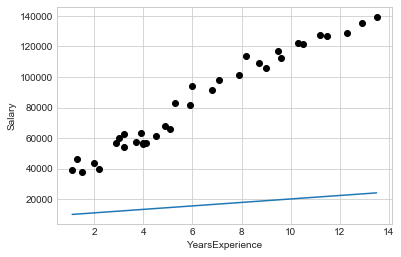

In [18]:
xx = df['YearsExperience'].to_numpy()
yy = df['Salary'].to_numpy()

plt.style.use('seaborn-whitegrid')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.plot(x, y, 'o', color='black')
plt.plot(x, b0[-1] + b1[-1] * xx)

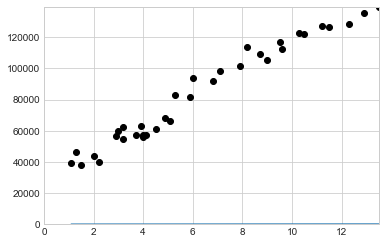

In [19]:
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
dots, = plt.plot(xx, yy, 'o', color='black')
line, = plt.plot([], [])

plt.ylim(0, np.max(df['Salary']))
plt.xlim(0, np.max(df['YearsExperience']))

def animate(i):
    line.set_ydata(b0[i] + (b1[i] * xx))
    line.set_xdata(xx)
    return line

ani = animation.FuncAnimation(fig, animate, frames=len(b0), interval=50)

HTML(ani.to_jshtml())

### Testy jednostkowe

In [76]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('datasets/Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, error = learn_and_fit(x, y)
                
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.269s

OK
